                                         QUESTION 3      

                               CARDIO WAVE

SHACHHI
230947

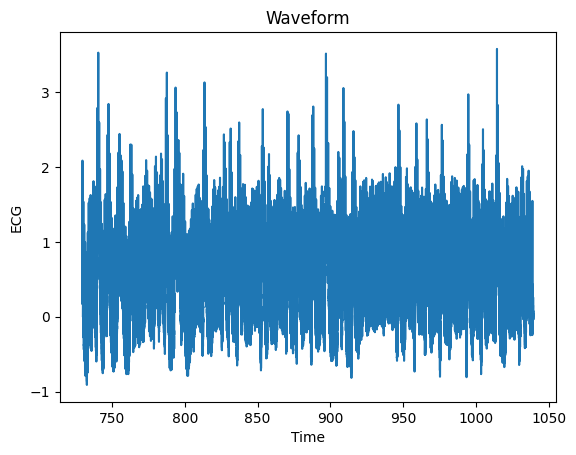

In [ ]:
#Raw Data of ECG WAVEFORM
import pandas as pd
import matplotlib.pyplot as plt
#reading the csv file
ecg_data=pd.read_csv('sam_ECG.csv')
#plotting the waveform
plt.plot(ecg_data['time'],ecg_data['ecg'])
plt.xlabel('Time')
plt.ylabel('ECG')
plt.title('Waveform')
plt.show()

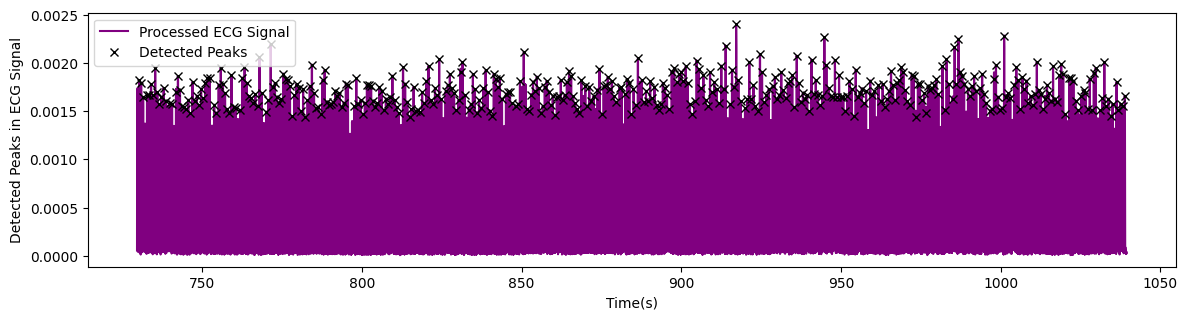

In [ ]:
#detecting the peaks of the raw ecg signal using find_peaks method
import numpy as np
from scipy.signal import find_peaks, butter,filtfilt

#applying bandpass filter to remove noise
def bandpass_filter(signal,lowcut,highcut,fs,order=2):
  nyquist=0.5*fs #min rate @which a finite bandwidth signal needs to be sampled to retain all info
  low=lowcut/nyquist
  high=highcut/nyquist
  b,a= butter(order,[low,high],btype='band') #creates butterworth filter
  return filtfilt(b,a,signal)  #applies filter to signal to remove high frequency noise
time=ecg_data['time']
ecg_signal=ecg_data['ecg']# to access the 2 columns
fs=1/(time[1]-time[0])   #sampling frequency from time intervals of ecg signal
filtered_ecg=bandpass_filter(ecg_signal,0.5,50,fs)

#processing the filtered ecg signal
diff_ecg=np.diff(filtered_ecg)  #differenciate to see the main spikes in ECG
squared_ecg=diff_ecg**2 #to make all data pts +ve and emphasize large deviations
window_size=int(0.15*fs)  #moving window integration to smooth squared signal
integrated_ecg=np.convolve(squared_ecg,np.ones(window_size)/window_size,mode='same')

#Detecting Peaks
threshold=0.6*np.max(integrated_ecg)
#setting threshold to detect peaks,0.6of the maxmvalue of integrated signal
#defining a minm distance b/w peaks to avoid detecting multiple peaks in a single heart beat
distance=int(0.6*fs)
peaks,_= find_peaks(integrated_ecg,height=threshold,distance=distance) #applying find peaks method


#plotting result
plt.figure(figsize=(12,6))
plt.subplot(2,1,2)
plt.plot(time[:-1],integrated_ecg,label='Processed ECG Signal',color='purple')
plt.plot(time[peaks],integrated_ecg[peaks],'x',label='Detected Peaks',color='black')
plt.xlabel('Time(s)')
plt.ylabel('Detected Peaks in ECG Signal')
plt.legend()
plt.tight_layout()
plt.show()

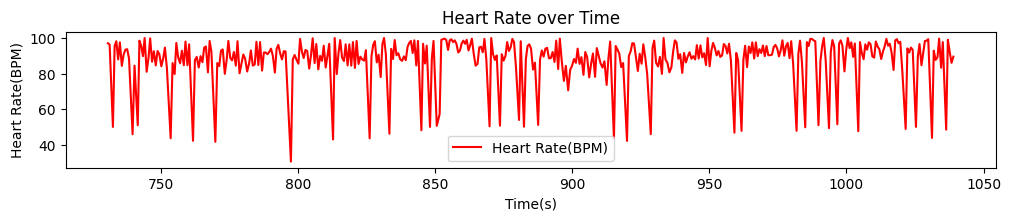

In [ ]:
#PLOTTING HEART RATE
peak_times=time[peaks]
rr_intervals=np.diff(peak_times) #time interval b/w consecutive peaks
heart_rate=60/rr_intervals
#plotting heart rate result
plt.figure(figsize=(12,6))
plt.subplot(3,1,3)
plt.plot(peak_times[1:],heart_rate,label='Heart Rate(BPM)',color='red')
plt.xlabel('Time(s)')
plt.ylabel('Heart Rate(BPM)')
plt.title('Heart Rate over Time')
plt.legend()
plt.show()

In [ ]:
#calculating the mean heart rate
mean=np.mean(heart_rate)  #mean method
print(f'Mean Heart Rate: {mean: .2f}BPM')



Mean Heart Rate:  88.04BPM
